In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools as it

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

1. Find the linear regression equation for this data.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
data = pd.DataFrame(ground_cricket_data)

In [ ]:
data

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
X = data[['Ground Temperature']]
X

,Ground Temperature
0,88.6
1,71.6
2,93.3
3,84.3
4,80.6
5,75.2
6,69.7
7,71.6
8,69.4
9,83.3


In [ ]:
y = data['Chirps/Second']
y

0     20.0
1     16.0
2     19.8
3     18.4
4     17.1
5     15.5
6     14.7
7     15.7
8     15.4
9     16.3
10    15.0
11    17.2
12    16.0
13    17.0
14    14.4
Name: Chirps/Second, dtype: float64

In [ ]:
data.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
data.isna().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X,y)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X)
y_pred

array([18.44509085, 14.99409541, 19.39918959, 17.572192  , 16.821093  ,
       15.72489445, 14.60839592, 14.99409541, 14.547496  , 17.36919227,
       16.61809327, 17.22709246, 16.821093  , 17.40979222, 15.94819415])

In [ ]:
y

0     20.0
1     16.0
2     19.8
3     18.4
4     17.1
5     15.5
6     14.7
7     15.7
8     15.4
9     16.3
10    15.0
11    17.2
12    16.0
13    17.0
14    14.4
Name: Chirps/Second, dtype: float64

In [ ]:
intercept = regressor.intercept_
intercept

0.45931464523595267

In [ ]:
coefficient = regressor.coef_
coefficient

array([0.20299973])

In [ ]:
regressor.score(X,y)

0.6922946529146998

In [ ]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'.format(regressor.coef_[0], regressor.intercept_))

Linear Regression Equation: y = 0.2030 * x + 0.4593


 2. Chart the original data and the equation on the chart.

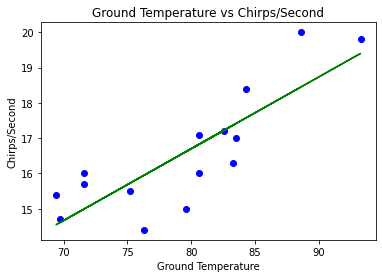

In [ ]:
plt.scatter(X, y, color='b')
plt.plot(X, y_pred, color='g')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

3.  Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
print('R_2 score: ', regressor.score(X,y))

R_2 score:  0.6922946529146998


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
print('mean_squared_error: ', mean_squared_error(y,y_pred))
print('mean_absolute_error: ', mean_absolute_error(y,y_pred))
print('r2_score: ', r2_score(y,y_pred))

mean_squared_error:  0.8425656192855705
mean_absolute_error:  0.7624469079359684
r2_score:  0.6922946529146998


Because this r2_score is below 0.8, this is not a good fit for this data.



4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [ ]:
regressor.predict([[95]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.74428913])

approximate rate would you expect the crickets to be chirping is 19.74428913

5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [ ]:
(18 - regressor.intercept_) / regressor.coef_

array([86.40743135])

The approximate ground temperature that morning was 86.40743135 F

With an observation of 18 chirps/sec, we expect a ground temp of **86.4**˚F

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

1.Find the linear regression equation for this data for brain weight to body weight.

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, 1]

In [ ]:
X

,Brain
0,3.385
1,0.480
2,1.350
3,465.000
4,36.330
...,...
57,160.000
58,0.900
59,1.620
60,0.104


In [ ]:
y

0      44.5
1      15.5
2       8.1
3     423.0
4     119.5
      ...  
57    169.0
58      2.6
59     11.4
60      2.5
61     50.4
Name: Body, Length: 62, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression 
linreg = LinearRegression()
linreg.fit(X, y) 

LinearRegression()

In [ ]:
y_pred = linreg.predict(X)
y_pred

array([  94.27598641,   91.46831446,   92.3091663 ,  540.42520718,
        126.11720924,  117.73768574,  105.33753734,   92.00955243,
         95.05401599,   91.41515716,   91.10201234,   91.89357287,
         91.97089258,   91.00922869,   91.06238599,   94.38713349,
         92.93738894,   92.64744003, 2552.67064467,   91.02662562,
        271.8358666 ,  594.54900376,   91.76309586,  100.66935988,
         94.19383422,   91.19769548,   92.36715609,  602.28097471,
        291.06914432,  173.15658746,   91.72926848,  150.927171  ,
       6522.0712267 ,   94.38713349,   97.57657151,  124.83176908,
         94.9187065 ,   91.12037577,   91.02662562,   91.01406117,
         92.35749112,  332.62848813,   93.42063713,  144.64494461,
        187.65403297,  141.41684675,  101.20093289,   91.53596921,
        148.99417827,   94.48378313,   95.14873263,   91.27501519,
         91.07688343,   91.12230876,   91.05078803,  276.5716988 ,
         93.90388531,  245.64381504,   91.87424294,   92.57012

In [ ]:
linreg.score(X,y)

0.8726620843043331

In [ ]:
intercept = linreg.intercept_
intercept

91.00439620740687

In [ ]:
coefficient = linreg.coef_
coefficient

array([0.96649637])

In [ ]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'.format(linreg.coef_[0], linreg.intercept_))

Linear Regression Equation: y = 0.9665 * x + 91.0044


2.Chart the original data and the equation on the chart.

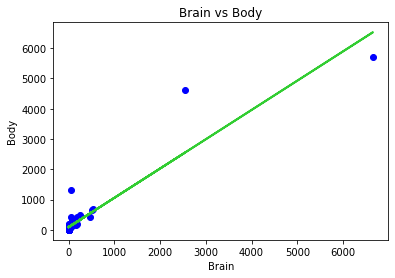

In [ ]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='limegreen',linewidth=2)
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
print('R_2 score: ', linreg.score(X,y))

R_2 score:  0.8726620843043331


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
print('mean_squared_error: ', mean_squared_error(y,y_pred))
print('mean_absolute_error: ', mean_absolute_error(y,y_pred))
print('r2_score: ', r2_score(y,y_pred))

mean_squared_error:  108423.21057266103
mean_absolute_error:  142.9636601200067
r2_score:  0.8726620843043331


**This R2 score is greater than 0.8, so it is a good fit for this data**

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [ ]:
df.isna().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X

,Sex,Rank,Year,Degree,YSdeg
0,0,3,25,1,35
1,0,3,13,1,22
2,0,3,10,1,23
3,1,3,7,1,27
4,0,3,19,0,30
5,0,3,16,1,21
6,1,3,0,0,32
7,0,3,16,1,18
8,0,3,13,0,30
9,0,3,13,0,31


In [ ]:
y

0     36350
1     35350
2     28200
3     26775
4     33696
5     28516
6     24900
7     31909
8     31850
9     32850
10    27025
11    24750
12    28200
13    23712
14    25748
15    29342
16    31114
17    24742
18    22906
19    24450
20    19175
21    20525
22    27959
23    38045
24    24832
25    25400
26    24800
27    25500
28    26182
29    23725
30    21600
31    23300
32    23713
33    20690
34    22450
35    20850
36    18304
37    17095
38    16700
39    17600
40    18075
41    18000
42    20999
43    17250
44    16500
45    16094
46    16150
47    15350
48    16244
49    16686
50    15000
51    20300
Name: Salary, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression 
linregs = LinearRegression()
linregs.fit(X, y) 

LinearRegression()

In [ ]:
y_pred = linregs.predict(X)
y_pred

array([34400.87095406, 30280.8311962 , 28703.46131917, 27981.51222111,
       33479.30927822, 31858.20107323, 25289.18504199, 32244.57279387,
       30582.15067125, 30453.3600977 , 29797.97142837, 26046.74100297,
       28993.34499261, 23450.90187105, 28091.8109778 , 28285.20660404,
       30538.41234329, 26090.89886279, 25479.24852141, 28361.24745835,
       21759.90109051, 22452.87980904, 28542.78775113, 28850.74370957,
       24051.11641081, 26933.11534775, 24759.25479938, 28432.48899444,
       23129.55473497, 21841.64899952, 21134.85957149, 23901.45911252,
       19538.99787761, 21505.65209023, 22986.53392007, 20574.60998882,
       18966.28654598, 17080.96071051, 16952.17013696, 17080.96071051,
       16598.10094268, 17028.21099127, 20349.33136808, 17968.68401582,
       16244.03174839, 16501.61289548, 17099.45252736, 17614.61482154,
       16018.75312766, 17260.54562726, 17260.54562726, 16648.89528588])

In [ ]:
linregs.score(X,y)

0.8547180674410969

In [ ]:
intercept = linregs.intercept_
intercept

11410.14654725559

In [ ]:
coefficients = linregs.coef_
coefficients

array([ 1241.7924996 ,  5586.18144952,   482.85976783, -1331.64406341,
        -128.79057354])

In [ ]:
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
print('Features & Coefficients = ')
print(list(zip(feature, linregs.coef_)))

Features & Coefficients = 
[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]


In [ ]:
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [ ]:
def lin_reg_eq_print(salary_discrim_cols, df):
    input_cols = df[salary_discrim_cols]
    salary = df['Salary']
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, salary)
    print('The equation for columns {} with respect to Salary:\n'
    '{} + {}'.format(salary_discrim_cols, regr_sd.coef_, regr_sd.intercept_))

In [ ]:
lin_reg_eq_print(salary_discrim_cols, df)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


In [ ]:
def lin_reg_wrt_focus(salary_discrim_cols, df, focus='Salary'):
    input_cols = df[salary_discrim_cols]
    focus_output = df[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

In [ ]:
print('R^2 score for equation using all columns: {}'
      .format(lin_reg_wrt_focus(salary_discrim_cols, df)))

R^2 score for equation using all columns: 0.8547180674410969


In [ ]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

In [ ]:
combos = get_combos(salary_discrim_cols)

In [ ]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
    return combo_scores

In [ ]:
combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533505, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180406, ('Sex', 'Year', 

**The selection with the best  score is: Sex, Rank, Year, Degree, YSdeg: 0.85471806744109691

**It is worth noting that Sex on its own has a score very close to zero (0.063898925832880038), indicating that it has no direct influence on salary.**

In [ ]:
num_by_sex = df.Sex.value_counts()
print('Num men: {}\nNum women: {}'.format(num_by_sex[0], num_by_sex[1]))

Num men: 38
Num women: 14


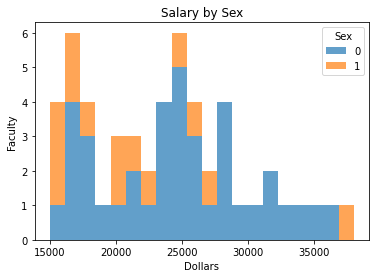

In [ ]:
df.pivot_table(index=df.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

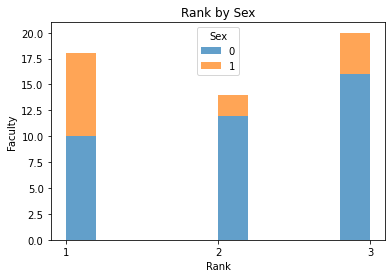

In [ ]:
df.pivot_table(index=df.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

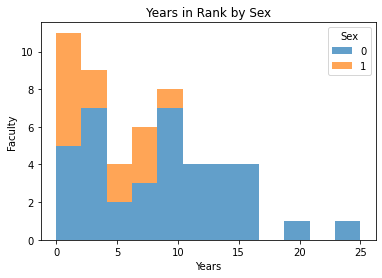

In [ ]:
df.pivot_table(index=df.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()

**sex on its own has a score very close to zero (0.063898925832880038), By this we can conclude that, There is no salary discrimination by Sex.**